In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pickle

In [42]:
df = pd.read_csv("DataSet/cleaned_stroke_dataset.csv")

In [43]:
df.head()

Age Gender  Hypertension  Heart Disease Marital Status      Work Type  \
0   56   Male             0              1        Married  Self-employed   
1   80   Male             0              0         Single  Self-employed   
2   26   Male             1              1        Married   Never Worked   
3   73   Male             0              0        Married   Never Worked   
4   51   Male             1              1       Divorced  Self-employed   

  Residence Type  Average Glucose Level  Body Mass Index (BMI)  \
0          Rural                 130.91                  22.37   
1          Urban                 183.73                  32.57   
2          Rural                 189.00                  20.32   
3          Urban                 185.29                  27.50   
4          Urban                 177.34                  29.06   

     Smoking Status  ... Physical Activity Stroke History  \
0        Non-smoker  ...          Moderate              0   
1        Non-smoker  ...               Low              0   
2   Formerly Smoked  ...              High              0   
3        Non-smoker  ...          Moderate              0   
4  Currently Smokes  ...               Low              0   

   Family History of Stroke Dietary Habits Stress Levels  \
0                       Yes          Vegan          3.48   
1                        No          Paleo          1.73   
2                       Yes          Paleo          7.31   
3                        No          Paleo          5.35   
4                       Yes    Pescatarian          6.84   

   Blood Pressure Levels  Diagnosis   HDL   LDL      Primary_Symptom  
0                140/108     Stroke  68.0  68.0  Difficulty Speaking  
1                 146/91     Stroke  63.0  63.0      Loss of Balance  
2                 154/97     Stroke  59.0  59.0             Seizures  
3                 174/81  No Stroke  70.0  70.0             Seizures  
4                 121/95     Stroke  65.0  65.0  Difficulty Speaking  

[5 rows x 21 columns]

In [44]:
df.isnull().sum()

Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Diagnosis                      0
HDL                            0
LDL                            0
Primary_Symptom             2500
dtype: int64

In [45]:
df['Primary_Symptom'] = df['Primary_Symptom'].fillna(method='ffill')

C:\Users\ASO\AppData\Local\Temp\ipykernel_10508\2776998806.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Primary_Symptom'] = df['Primary_Symptom'].fillna(method='ffill')


In [46]:
df.isnull().sum()

Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Diagnosis                   0
HDL                         0
LDL                         0
Primary_Symptom             0
dtype: int64

In [47]:
df.describe()

Age  Hypertension  Heart Disease  Average Glucose Level  \
count  15000.000000  15000.000000   15000.000000           15000.000000   
mean      54.035667      0.249000       0.502933             129.445209   
std       21.063111      0.432448       0.500008              40.487792   
min       18.000000      0.000000       0.000000              60.000000   
25%       36.000000      0.000000       0.000000              94.517500   
50%       54.000000      0.000000       1.000000             128.900000   
75%       72.000000      0.000000       1.000000             164.592500   
max       90.000000      1.000000       1.000000             200.000000   

       Body Mass Index (BMI)  Stroke History  Stress Levels           HDL  \
count           15000.000000    15000.000000   15000.000000  15000.000000   
mean               27.474302        0.500267       5.022694     55.064933   
std                 7.230201        0.500017       2.873223     14.845410   
min                15.010000        0.000000       0.000000     30.000000   
25%                21.160000        0.000000       2.540000     42.000000   
50%                27.420000        1.000000       5.050000     55.000000   
75%                33.720000        1.000000       7.520000     68.000000   
max                40.000000        1.000000      10.000000     80.000000   

                LDL  
count  15000.000000  
mean      55.064933  
std       14.845410  
min       30.000000  
25%       42.000000  
50%       55.000000  
75%       68.000000  
max       80.000000

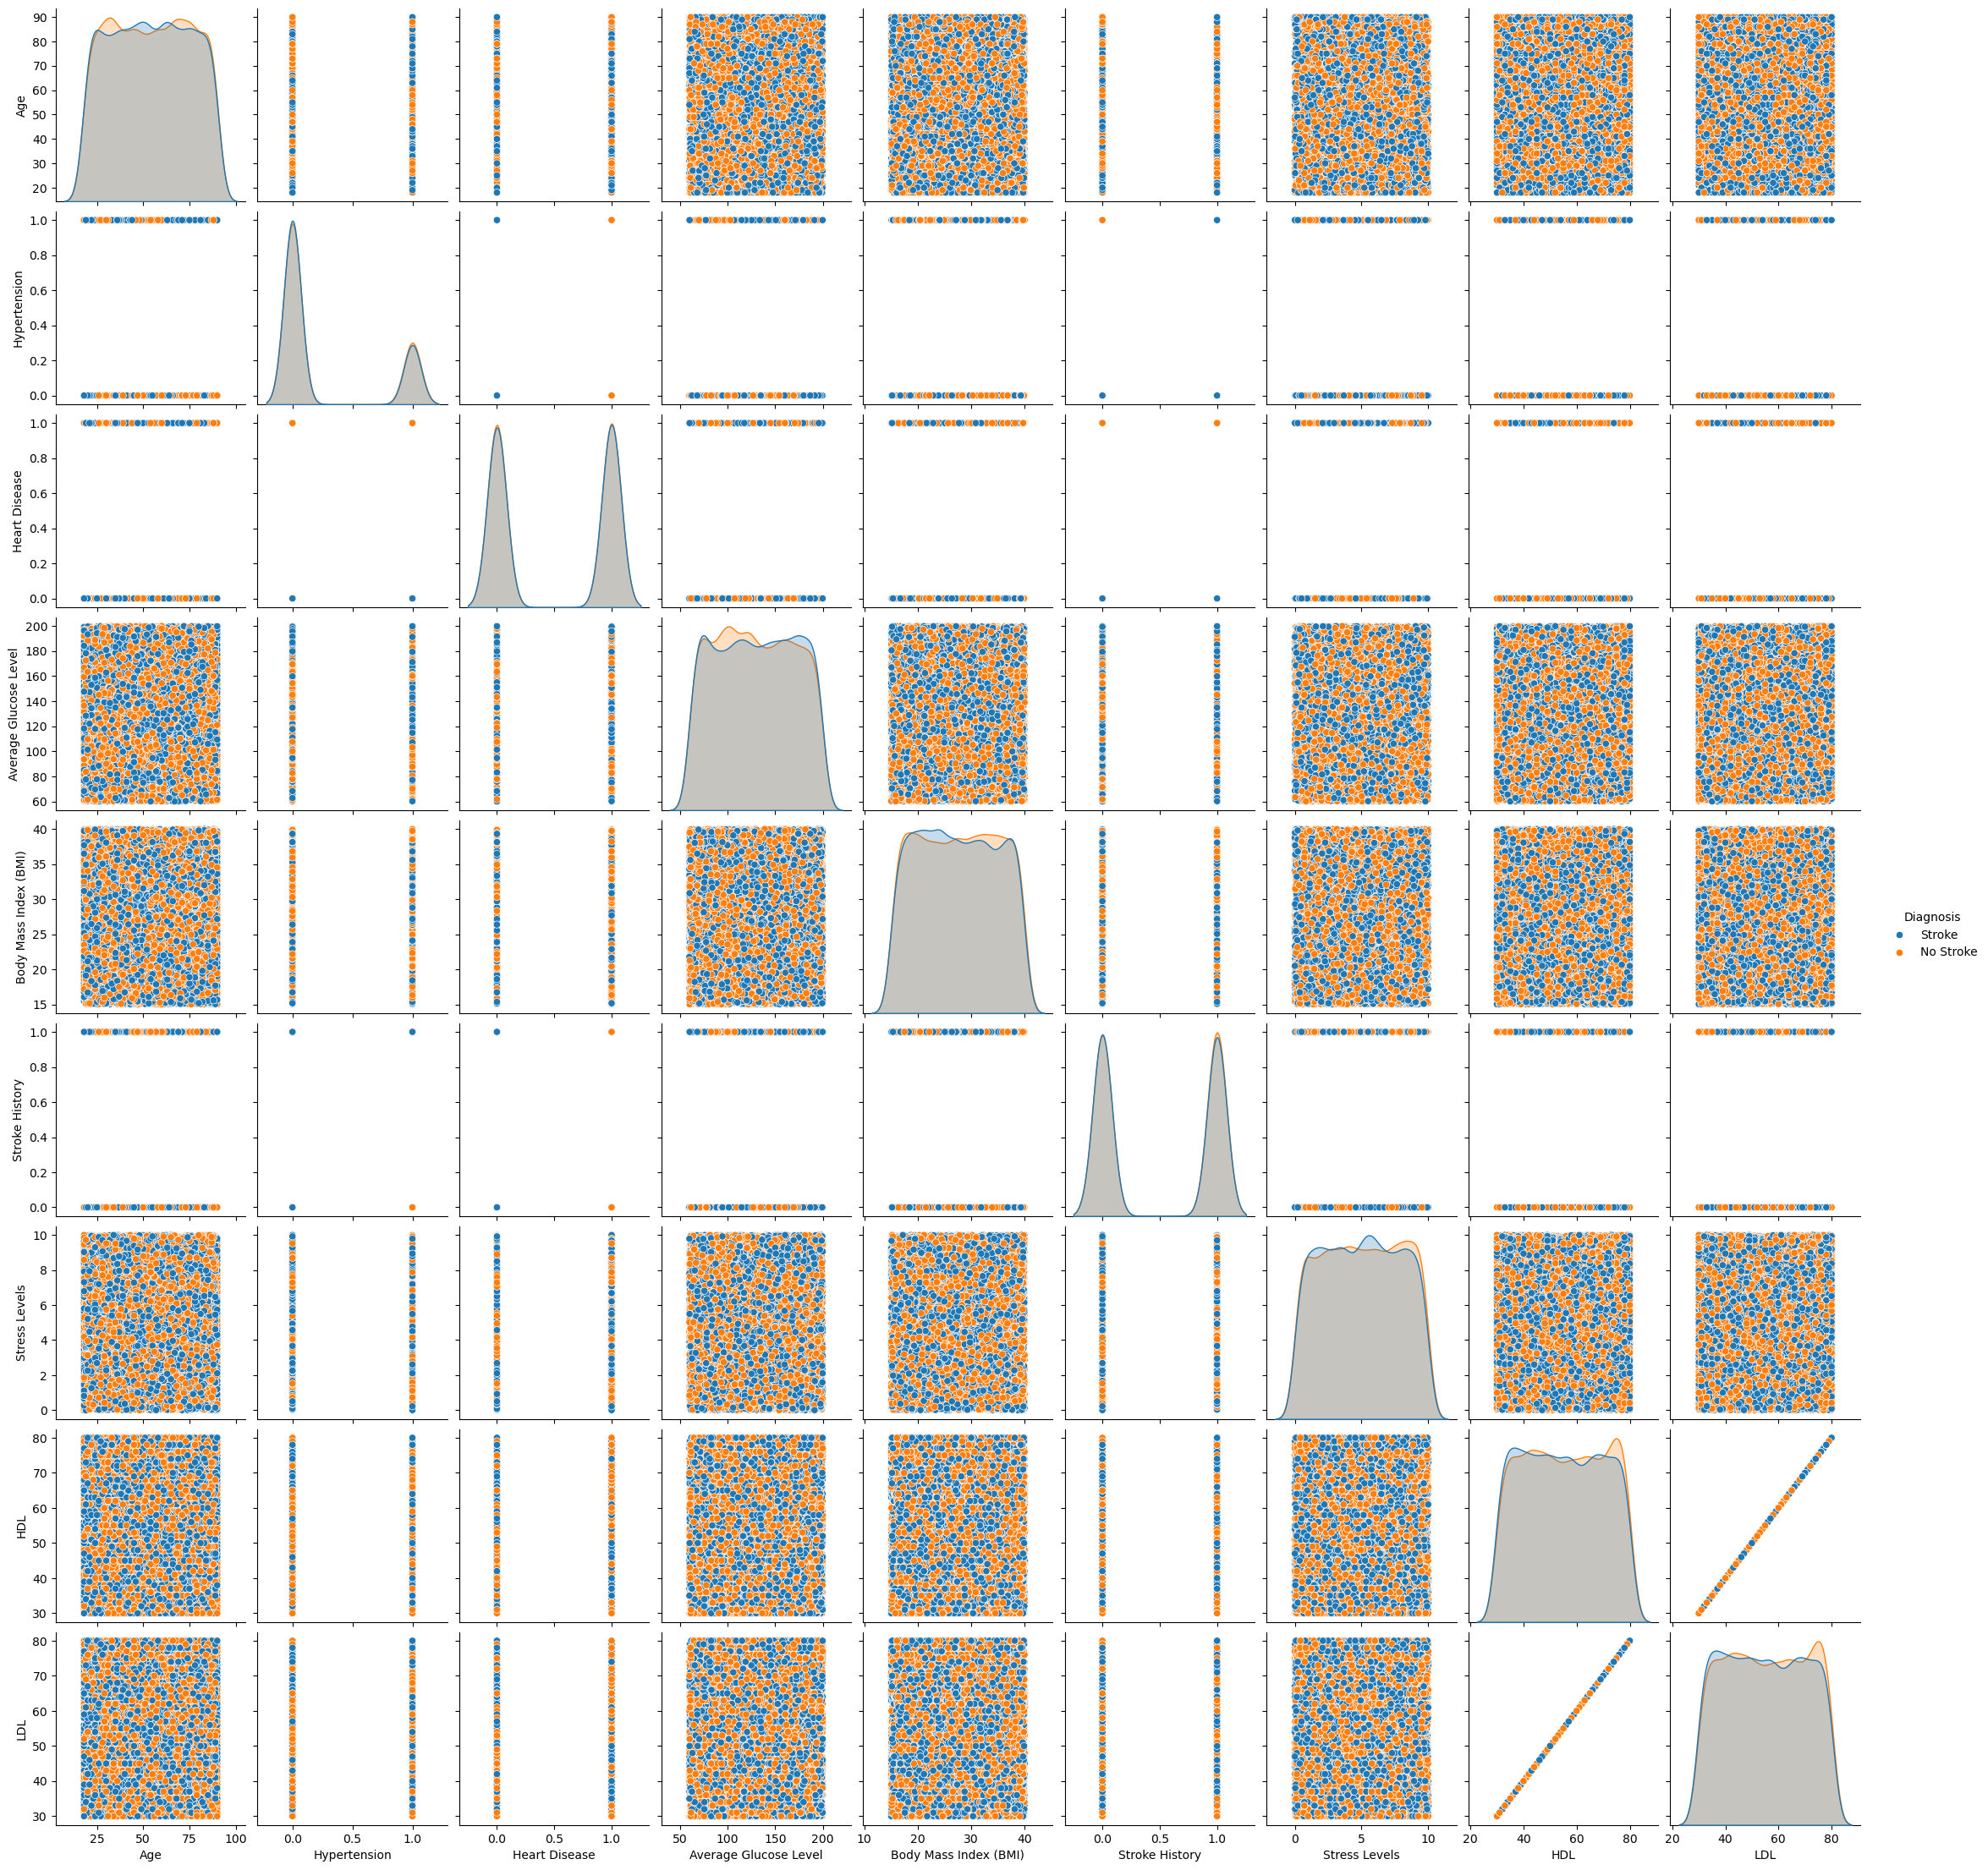

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="Diagnosis")   # use 'hue' to color by target column
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  object 
 5   Work Type                 15000 non-null  object 
 6   Residence Type            15000 non-null  object 
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  object 
 10  Alcohol Intake            15000 non-null  object 
 11  Physical Activity         15000 non-null  object 
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  object 
 14  Dietar

In [49]:
selected_columns = [
    "Age",
    "Hypertension",
    "Heart Disease",
    "Average Glucose Level",
    "Body Mass Index (BMI)",
    "Smoking Status",
    "Stroke History",
    "HDL",
    "LDL",
    "Blood Pressure Levels",
    "Primary_Symptom",
    "Diagnosis"
]

df = df[selected_columns]

## Feature Engineering

In [50]:
df['Blood Pressure Levels']

0        140/108
1         146/91
2         154/97
3         174/81
4         121/95
          ...   
14995     171/92
14996     155/71
14997    121/110
14998     157/74
14999     133/81
Name: Blood Pressure Levels, Length: 15000, dtype: object

In [51]:
df[['SystolicBP', 'DiastolicBP']] = df['Blood Pressure Levels'].str.split('/', expand=True).astype(float)
df = df.drop(columns=['Blood Pressure Levels'])


In [53]:
df.head()

Age  Hypertension  Heart Disease  Average Glucose Level  \
0   56             0              1                 130.91   
1   80             0              0                 183.73   
2   26             1              1                 189.00   
3   73             0              0                 185.29   
4   51             1              1                 177.34   

   Body Mass Index (BMI)    Smoking Status  Stroke History   HDL   LDL  \
0                  22.37        Non-smoker               0  68.0  68.0   
1                  32.57        Non-smoker               0  63.0  63.0   
2                  20.32   Formerly Smoked               0  59.0  59.0   
3                  27.50        Non-smoker               0  70.0  70.0   
4                  29.06  Currently Smokes               0  65.0  65.0   

       Primary_Symptom  Diagnosis  SystolicBP  DiastolicBP  
0  Difficulty Speaking     Stroke       140.0        108.0  
1      Loss of Balance     Stroke       146.0         91.0  
2             Seizures     Stroke       154.0         97.0  
3             Seizures  No Stroke       174.0         81.0  
4  Difficulty Speaking     Stroke       121.0         95.0

In [58]:
df["Smoking Status"].unique()

array(['Non-smoker', 'Formerly Smoked', 'Currently Smokes'], dtype=object)

In [59]:
df["Primary_Symptom"].unique()

array(['Difficulty Speaking', 'Loss of Balance', 'Seizures',
       'Severe Fatigue', 'Dizziness', 'Confusion', 'Numbness', 'Weakness',
       'Blurred Vision', 'Headache'], dtype=object)

In [60]:
df["Diagnosis"].unique()

array(['Stroke', 'No Stroke'], dtype=object)

In [67]:
encoder = LabelEncoder()
df['Smoking Status'] = encoder.fit_transform(df['Smoking Status'])
df

Age  Hypertension  Heart Disease  Average Glucose Level  \
0       56             0              1                 130.91   
1       80             0              0                 183.73   
2       26             1              1                 189.00   
3       73             0              0                 185.29   
4       51             1              1                 177.34   
...    ...           ...            ...                    ...   
14995   88             1              1                 160.22   
14996   47             0              0                 107.58   
14997   35             0              0                 134.90   
14998   73             0              0                 169.42   
14999   64             0              0                 186.88   

       Body Mass Index (BMI)  Smoking Status  Stroke History   HDL   LDL  \
0                      22.37               2               0  68.0  68.0   
1                      32.57               2               0  63.0  63.0   
2                      20.32               1               0  59.0  59.0   
3                      27.50               2               0  70.0  70.0   
4                      29.06               0               0  65.0  65.0   
...                      ...             ...             ...   ...   ...   
14995                  39.73               0               0  44.0  44.0   
14996                  22.17               2               1  35.0  35.0   
14997                  26.38               2               1  57.0  57.0   
14998                  28.32               2               0  79.0  79.0   
14999                  39.30               0               0  78.0  78.0   

           Primary_Symptom  Diagnosis  SystolicBP  DiastolicBP  
0      Difficulty Speaking     Stroke       140.0        108.0  
1          Loss of Balance     Stroke       146.0         91.0  
2                 Seizures     Stroke       154.0         97.0  
3                 Seizures  No Stroke       174.0         81.0  
4      Difficulty Speaking     Stroke       121.0         95.0  
...                    ...        ...         ...          ...  
14995             Headache  No Stroke       171.0         92.0  
14996  Difficulty Speaking  No Stroke       155.0         71.0  
14997  Difficulty Speaking     Stroke       121.0        110.0  
14998       Severe Fatigue  No Stroke       157.0         74.0  
14999             Headache     Stroke       133.0         81.0  

[15000 rows x 13 columns]

In [68]:
df['Diagnosis'] = encoder.fit_transform(df['Diagnosis'])
df['Primary_Symptom'] = encoder.fit_transform(df['Primary_Symptom'])
df

Age  Hypertension  Heart Disease  Average Glucose Level  \
0       56             0              1                 130.91   
1       80             0              0                 183.73   
2       26             1              1                 189.00   
3       73             0              0                 185.29   
4       51             1              1                 177.34   
...    ...           ...            ...                    ...   
14995   88             1              1                 160.22   
14996   47             0              0                 107.58   
14997   35             0              0                 134.90   
14998   73             0              0                 169.42   
14999   64             0              0                 186.88   

       Body Mass Index (BMI)  Smoking Status  Stroke History   HDL   LDL  \
0                      22.37               2               0  68.0  68.0   
1                      32.57               2               0  63.0  63.0   
2                      20.32               1               0  59.0  59.0   
3                      27.50               2               0  70.0  70.0   
4                      29.06               0               0  65.0  65.0   
...                      ...             ...             ...   ...   ...   
14995                  39.73               0               0  44.0  44.0   
14996                  22.17               2               1  35.0  35.0   
14997                  26.38               2               1  57.0  57.0   
14998                  28.32               2               0  79.0  79.0   
14999                  39.30               0               0  78.0  78.0   

       Primary_Symptom  Diagnosis  SystolicBP  DiastolicBP  
0                    2          1       140.0        108.0  
1                    5          1       146.0         91.0  
2                    7          1       154.0         97.0  
3                    7          0       174.0         81.0  
4                    2          1       121.0         95.0  
...                ...        ...         ...          ...  
14995                4          0       171.0         92.0  
14996                2          0       155.0         71.0  
14997                2          1       121.0        110.0  
14998                8          0       157.0         74.0  
14999                4          1       133.0         81.0  

[15000 rows x 13 columns]

In [69]:
X = df.drop('Diagnosis', axis = 1)
y = df['Diagnosis']

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=42)
model = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs', max_iter=1000)

In [95]:
model.fit(X_train, y_train)
y_pred  = model.predict(X_test)

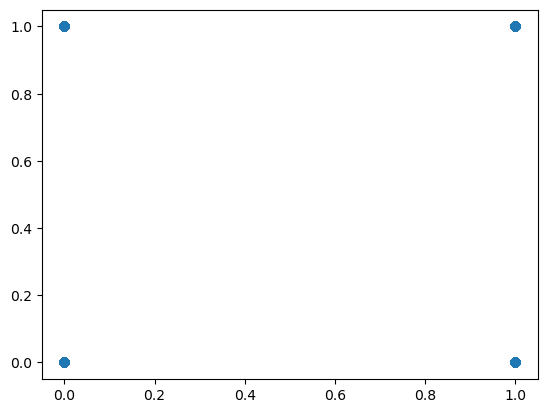

In [96]:
plt.scatter(y_test, y_pred)

In [105]:
print(accuracy_score(y_test, y_pred))

0.506


In [98]:
filename = "stroke_model.pkl"
pickle.dump(model, open(filename, 'wb'))
if(True):
    print("stroke_model saved Successfully!")

stroke_model saved Successfully!


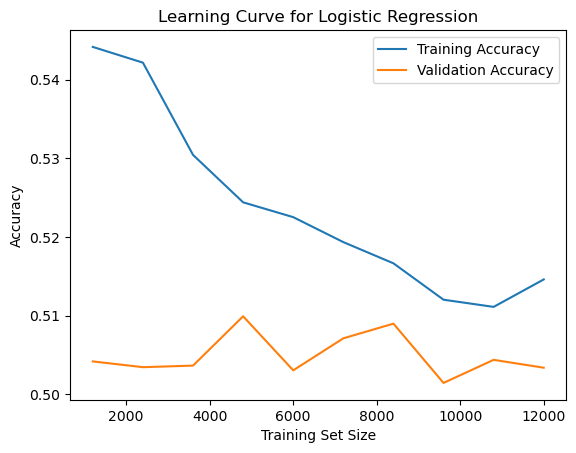

In [99]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    model, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Mean across folds
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# Plot
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, val_mean, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.show()


In [104]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)

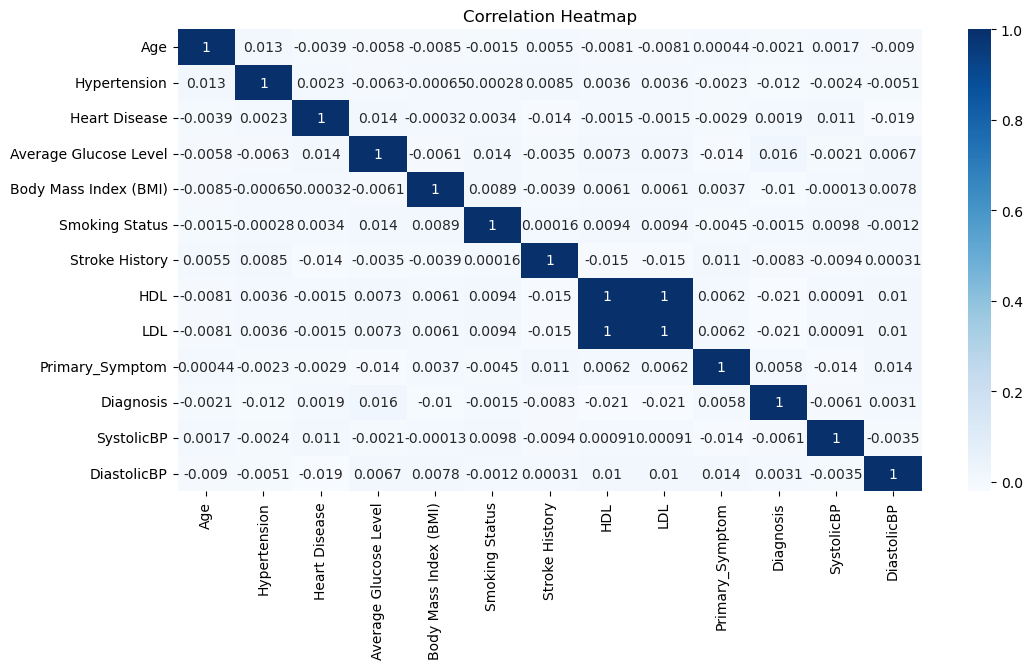

In [93]:
corr_matrix = df.corr()
plt.figure(figsize=(12,6))  # optional, makes plot bigger
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()